# Proyecto Mineria de datos (Determinar si el peso del bebe es bajo o no)
## Modelos de Machine Learning

In [68]:
import pandas as pd

# Lee el archivo CSV
data = pd.read_csv('data_set_completo.csv')
print(data.shape)
columns_to_check = ['Libras', 'Onzas', 'Tohite', 'Tohim', 'Tohivi','Edadm']
data = data[~data[columns_to_check].isin([99,999]).any(axis=1)]
print(data.shape)
# Calcula la nueva columna "peso_bebe"
data['peso_bebe'] = data['Libras'] + (data['Onzas'] / 16)
data['classification'] = data['peso_bebe'].apply(lambda x: 0 if x <= 5.5 else 1)
data = data.drop("Unnamed: 0", axis=1)


(1091330, 43)
(1068100, 43)


In [69]:
print(data.head())

   Depreg  Mupreg  Mesreg  Añoreg  TipoIns  Depocu  Mupocu  Libras  Onzas  \
0       1     115      10    2018        3       1     101       5     12   
1       1     106      10    2018        3       1     101       6     12   
2       1     101       4    2018        3       1     101       6      8   
3      21    2106       4    2018        3      21    2106       6      8   
4      18    1805      10    2018        3      18    1805       9      1   

   Diaocu  ...  Mupnam  Escolam  Ocupam  Asisrec  Sitioocu  Tohite  Tohim  \
0      17  ...     101        2      97        3         4       3      0   
1       8  ...     106        4      97        3         4       1      0   
2      12  ...     101        3      97        3         4       1      0   
3      11  ...     507        4      97        3         4       2      0   
4       4  ...    1909        1      97        3         4      12      0   

   Tohivi  peso_bebe  classification  
0       3     5.7500               

In [70]:
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr



# Variables categóricas
variables_categoricas = ['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Sexo', 'Diaocu', 'Mesocu',
                         'Tipar',"ViaPar", 'Deprem', 'Muprem', 'Escivm', 'Asisrec', 'Sitioocu', 'classification']

# Variables cuantitativas
variables_cuantitativas = ['Edadm', 'Tohite', 'Tohim', 'Tohivi', 'peso_bebe', 'classification']

# Prueba de chi-cuadrado para las variables categóricas
chi2_results = {}
for variable in variables_categoricas:
    contingency_table = pd.crosstab(data[variable], data['classification'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[variable] = (chi2, p_value)

# Prueba de correlación para las variables cuantitativas
correlation_results = {}
for variable in variables_cuantitativas:
    correlation, p_value = pearsonr(data[variable], data['classification'])
    correlation_results[variable] = (correlation, p_value)

# Imprimir los resultados de la prueba de chi-cuadrado
print("Resultados de la prueba de chi-cuadrado:")
for variable, (chi2, p_value) in chi2_results.items():
    print(f"{variable}: Chi2 = {chi2}, p-value = {p_value}")

# Imprimir los resultados de la prueba de correlación
print("\nResultados de la prueba de correlación:")
for variable, (correlation, p_value) in correlation_results.items():
    print(f"{variable}: Correlation = {correlation}, p-value = {p_value}")


Resultados de la prueba de chi-cuadrado:
Depreg: Chi2 = 6832.266882298631, p-value = 0.0
Mupreg: Chi2 = 20388.81711156488, p-value = 0.0
Mesreg: Chi2 = 53.37303899606705, p-value = 1.5355496733228042e-07
Añoreg: Chi2 = 344.610648183958, p-value = 2.1908253566861935e-74
Depocu: Chi2 = 6981.452355685638, p-value = 0.0
Mupocu: Chi2 = 22760.8091260673, p-value = 0.0
Sexo: Chi2 = 2113.0520258143033, p-value = 0.0
Diaocu: Chi2 = 28.339176910958727, p-value = 0.5524682922470174
Mesocu: Chi2 = 91.08186403450352, p-value = 1.0229633437017034e-14
Tipar: Chi2 = 47621.01315566545, p-value = 0.0
ViaPar: Chi2 = 5549.956419088421, p-value = 0.0
Deprem: Chi2 = 5785.262634371842, p-value = 0.0
Muprem: Chi2 = 11766.942272249005, p-value = 0.0
Escivm: Chi2 = 179.6825169716514, p-value = 1.0328263621454905e-38
Asisrec: Chi2 = 3522.2004720742025, p-value = 0.0
Sitioocu: Chi2 = 4665.275417342266, p-value = 0.0
classification: Chi2 = 1068091.1601804898, p-value = 0.0

Resultados de la prueba de correlación:


## Regresion logistica

(1068100, 5)
(1068100,)
              precision    recall  f1-score   support

           0       0.77      0.07      0.13     41879
           1       0.88      1.00      0.93    278551

    accuracy                           0.88    320430
   macro avg       0.82      0.53      0.53    320430
weighted avg       0.86      0.88      0.83    320430

Precisión en el conjunto de entrenamiento: 0.8767651504005778
Precisión en el conjunto de prueba: 0.8759323409168929
[[  3019  38860]
 [   895 277656]]


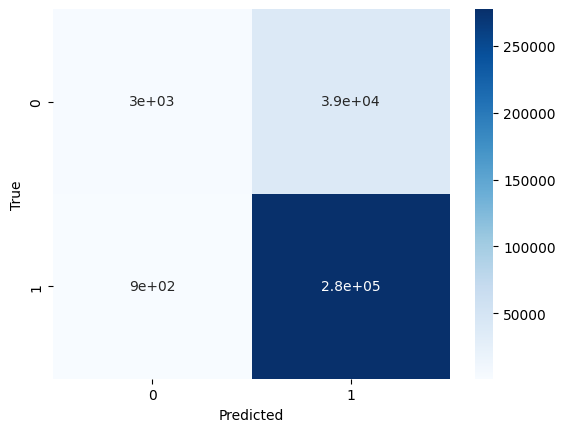

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler



variables_seleccionadas = ['Sexo','Tipar',"ViaPar",'Sitioocu',"Mupocu" ,'classification']
data_selected = data[variables_seleccionadas]


# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = data_selected.drop('classification', axis=1)
y = data_selected['classification']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)


cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Imprimir la precisión en ambos conjuntos


c:\Users\pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Resultados de la validación cruzada: [0.87210467 0.87573261 0.87646756 0.87017133 0.87630372]
Precisión promedio: 0.87
Desviación estándar: 0.00


c:\Users\pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


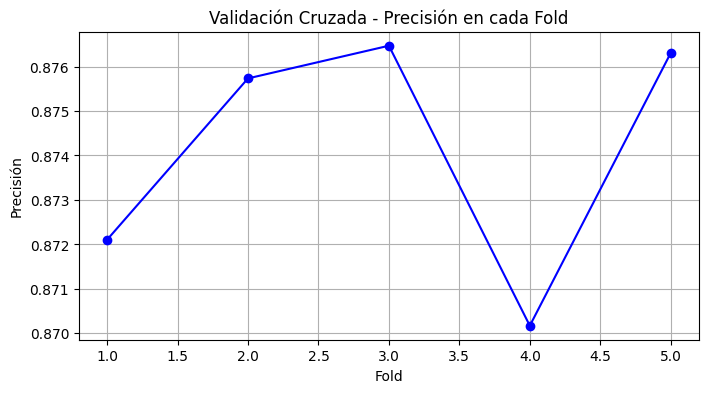

In [72]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Realizar validación cruzada con 5 particiones
cv_scores = cross_val_score(model, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:", cv_scores)
print("Precisión promedio: {:.2f}".format(np.mean(cv_scores)))
print("Desviación estándar: {:.2f}".format(np.std(cv_scores)))

# Generar gráfica de los resultados de la validación cruzada
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Precisión')
plt.title('Validación Cruzada - Precisión en cada Fold')
plt.grid(True)
plt.show()

## Redes neuronales


In [73]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)


Matriz de confusión
 [[  3017  38862]
 [   894 277657]]
Accuracy:  0.8759292201104766
Precision:  0.8759292201104766
recall:  0.8759292201104766


### Tuneo de parametros

In [75]:
data_selected = data[variables_seleccionadas]
target = data_selected.pop("classification")
variables_seleccionadas = variables_seleccionadas.remove("classification")

In [76]:
#variables_seleccionadas
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,variables_seleccionadas),
])

In [77]:
from sklearn.pipeline import make_pipeline
modelo = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3)))
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  None)])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [83]:
X = data_selected.drop('classification', axis=1)
y = data_selected['classification']

data_train, data_test, target_train, target_test = train_test_split(
    data_selected, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
print("Shape target train",target_train.shape)
data_selected.isnull().sum()

Shape train (747670, 5)
Shape test (320430, 5)
Shape target train (747670,)


Sexo        0
Tipar       0
ViaPar      0
Sitioocu    0
Mupocu      0
dtype: int64

In [84]:

modelo.fit(data_train,target_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,10),
    'mlpclassifier__hidden_layer_sizes':((3,2),(5,3),(10,2))}
model_grid_search = GridSearchCV(modelo, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)